In [1]:
#Numpy - for scientific computing
import numpy as np
import scipy

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import lmfit

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

In [7]:
#Import files and add the names as strings to an array
file_path = '../../analyzed_data/gliding/'
ff1 = '2023-07-10_Gliding/'
ff2 = '2023-07-11_Gliding/'
ff3 = '2023-07-12_Gliding/'
ff4 = '2023-08-11_Gliding/'
ff5 = '2023-08-15_Gliding/'
ff6 = '2023-08-16_Gliding/'
ff7 = '2023-08-17_Gliding/'
ff8 = '2023-08-18_Gliding/'
ff = [ff1, ff2, ff3, ff4, ff5, ff6, ff7, ff8]
included_files = '*.csv'

data_csv = []
for file_folder in ff:
    path = file_path+file_folder+included_files
    files = np.sort(glob.glob(path))
    data_csv.append(files)
data_csv = np.concatenate(data_csv)

#Convert file names to a dataframe
dfs = []
for file in data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    dfs.append(temp_df)
df=pd.concat(dfs)

#reset the index and drop any extraneous columns
df=df.reset_index()
df=df.drop(columns=['Unnamed: 0', 'level_0'])

In [8]:
df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,skele r^2,MT len (um),motor conc,MT dilute,ATP,ADP,P,time (seconds),date,file_name
0,0,38,38.664683,6.083507,28.157895,286.263158,1.409637,1,55.942036,0.923608,0.949581,3.475225,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
1,2,19,21.908902,0.000000,29.000000,243.000000,1.570796,4,38.253891,0.987443,0.977423,2.165416,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
2,6,41,48.014455,1.788818,89.000000,166.609756,0.169339,10,57.566606,0.980215,0.932844,5.442741,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
3,7,22,31.639965,2.635461,82.454545,465.863636,0.657876,13,45.983571,0.988882,0.987238,2.266331,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
4,9,35,43.105455,2.065787,98.942857,281.000000,-1.214058,17,93.540271,0.923645,0.822027,4.066268,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,41,14,16.838139,1.612306,460.571429,344.071429,0.373071,160,50.559649,0.959302,0.922589,2.016603,0.0625,600.0,3000.0,1000.0,0.0,560.0,2023-08-18,2023-08-18_Gliding_0.0625uMNCD_600MT_3000uMATP...
4648,42,17,25.356942,1.417100,487.470588,394.764706,-0.809506,167,40.363274,0.953758,0.903493,2.172642,0.0625,600.0,3000.0,1000.0,0.0,560.0,2023-08-18,2023-08-18_Gliding_0.0625uMNCD_600MT_3000uMATP...
4649,43,10,12.138962,1.133847,485.600000,46.500000,1.240611,168,35.998997,0.974948,0.954037,1.186025,0.0625,600.0,3000.0,1000.0,0.0,560.0,2023-08-18,2023-08-18_Gliding_0.0625uMNCD_600MT_3000uMATP...
4650,44,12,16.581008,1.476922,497.583333,155.416667,0.929137,170,32.660522,0.914565,0.895558,1.495674,0.0625,600.0,3000.0,1000.0,0.0,560.0,2023-08-18,2023-08-18_Gliding_0.0625uMNCD_600MT_3000uMATP...


# Motor Concentration
1410 ATP, 0 ADP, 0 P

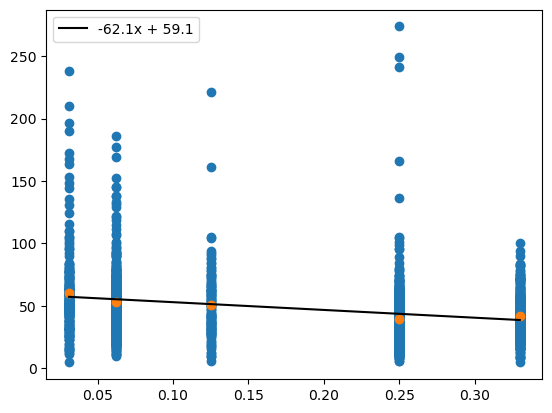

In [40]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mot_mean = df_plot.groupby('motor conc').mean().reset_index()
plt.scatter(df_plot['motor conc'], df_plot['speed (nm/s)'])
plt.scatter(mot_mean['motor conc'], mot_mean['speed (nm/s)'])
motconcfit = np.polyfit(mot_mean['motor conc'], mot_mean['speed (nm/s)'], deg=1)
plt.plot(mot_mean['motor conc'], motconcfit[0]*mot_mean['motor conc'] + motconcfit[1], 
         color='k', 
         label=str(round(motconcfit[0],1)) + 'x + ' + str(round(motconcfit[1],1)))
plt.legend()

# ATP
motor 0.0625, 0 ADP, 0 P

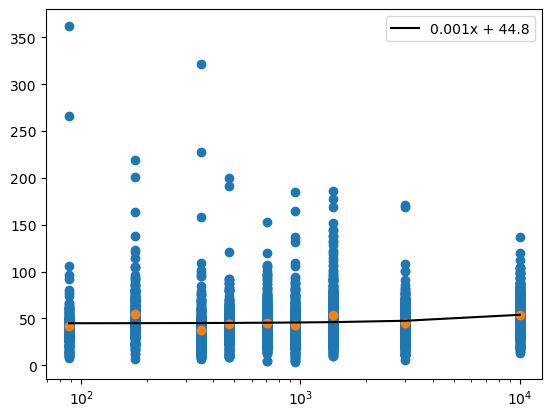

In [50]:
df_plot = df.loc[(df["motor conc"] == 0.0625) & (df["ADP"] == 0) & (df["P"] == 0), :]
ATP_mean = df_plot.groupby('ATP').mean().reset_index()
plt.scatter(df_plot['ATP'], df_plot['speed (nm/s)'])
plt.scatter(ATP_mean['ATP'], ATP_mean['speed (nm/s)'])
ATPfit = np.polyfit(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], deg=1)
plt.plot(ATP_mean['ATP'], ATPfit[0]*ATP_mean['ATP'] + ATPfit[1], 
         color='k', 
         label=str(round(ATPfit[0],3)) + 'x + ' + str(round(ATPfit[1],1)))
plt.legend()
plt.xscale('log')
#plt.yscale('log')

In [ ]:
df_plot = df.loc[(df["motor conc"] == 0.0625) & (df["ADP"] == 0) & (df["P"] == 0), :]


# ADP

# P 

# MT length
- individual movies/conditions?
- All

In [52]:
len(np.unique(df['file_name']))

267

# Date

# General Time

# By hand